In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.signal import medfilt
import sys
# Add a new path with needed .py files.
sys.path.insert(0, 'C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\MedianFilter\Python') 

import functions
import gitInformation

In [2]:
%matplotlib inline

In [3]:
gitInformation.printInformation()

Information about this notebook
Date: 2015-11-12
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\.git
Current git SHA: d7756ad2fdb62d7812412d4b0afbb47d805a4564
Remotes: fork, origin, 
Current branch: master
fork remote URL: http://github.com/dowa4213/kt-2015-DSPHandsOn.git
origin remote URL: https://github.com/ktakagaki/kt-2015-DSPHandsOn.git


In [4]:
# Sine wave, 16 wave numbers, 16*128 samples  
x = np.linspace(0, 2, 16*128)
data = np.sin(16*np.pi*x)
# Different noises with Standard deviation (spread or "width") 0.1 will be saved in
# so we have a signal/noise ration = 10
diff_noise = np.zeros((140,len(data)))
# Noised sine waves. 
noised_sines = np.zeros((140,len(data)))
# Median filtered wave.
medfilter = np.zeros((140,len(data)))
# Filtered sine waves (noised_sines - medfilter)
filtered_sines = np.zeros((140,len(data)))
# Behavior of the median filter. Save the max values of the filtered waves in it.
behav = np.zeros(140)
# Needed to get all points at the same x value
windowLength = np.zeros(140)
SN = np.zeros(140)

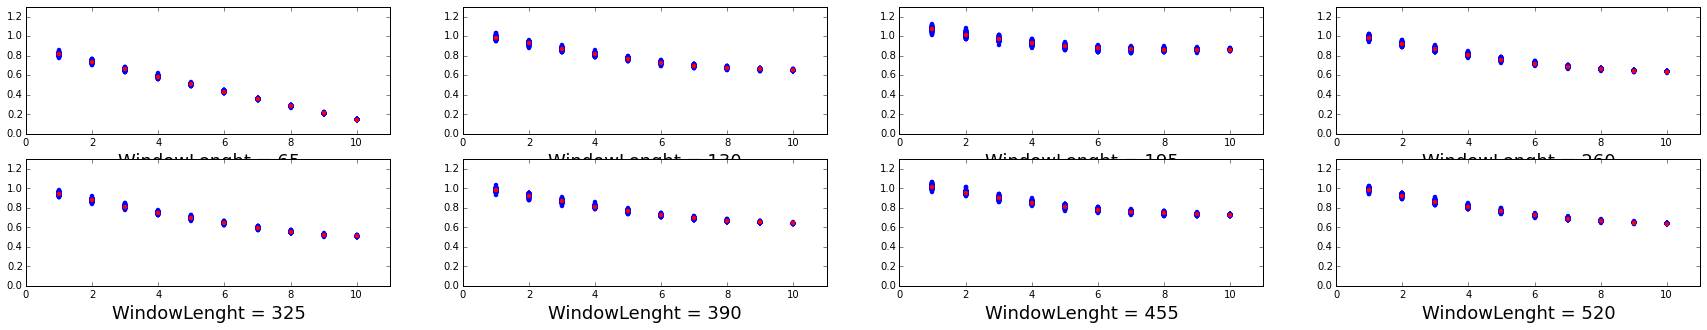

In [29]:
# Plotting the behavior with given window length and different SN-Ratio
fig = plt.figure(figsize=(30,10))
count = 0
for w in range (65,256,64):
    count = count + 1
    for x in range(1,11):
        for i in range (len(diff_noise)):
            diff_noise[i, :] = np.random.normal(0, x/10., len(data))
            noised_sines[i, :] = data + diff_noise[i, :]
            medfilter[i, :] = medfilt(noised_sines[i, :], w)
            filtered_sines[i, :] = noised_sines[i, :] - medfilter[i, :]
            behav[i] = np.mean(np.abs(filtered_sines[i, :]))
        ax = plt.subplot(2,4,count)
        mean = np.mean(behav)
        plt.axis([0, x+1, 0, 1.3])
        plt.scatter(11 - x,mean, color = 'red',lw=0)
        plt.xlabel(("WindowLenght = " + str(, fontsize = 18)

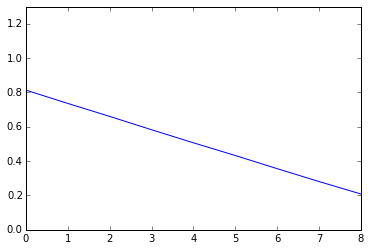

In [44]:
# Plotting the behavior with given window length and different SN-Ratio
w = 65
values = np.zeros(11)
for x in range(1,11):
    for i in range (len(diff_noise)):
        diff_noise[i, :] = np.random.normal(0, x/10., len(data))
        noised_sines[i, :] = data + diff_noise[i, :]
        medfilter[i, :] = medfilt(noised_sines[i, :], w)
        filtered_sines[i, :] = noised_sines[i, :] - medfilter[i, :]
        behav[i] = np.mean(np.abs(filtered_sines[i, :]))    
    mean = np.mean(behav)
    values[-x] = mean
plt.plot(values[1:], 'or-')

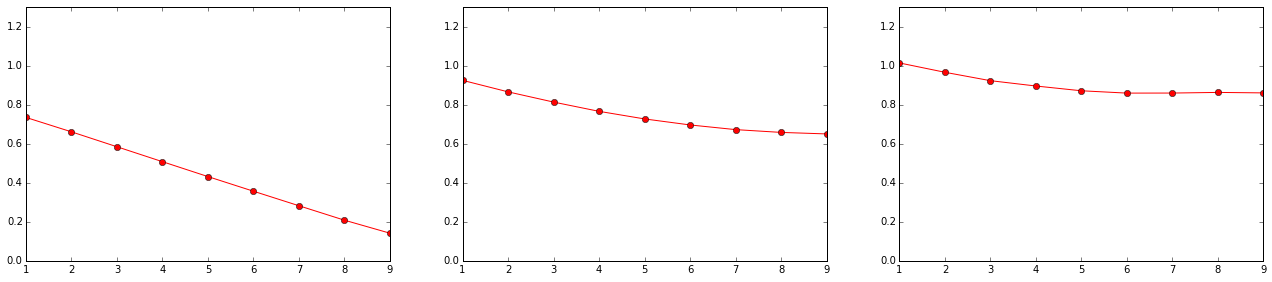

In [62]:
# Plotting the behavior with given window length and different SN-Ratio
fig = plt.figure(figsize=(30,10))
count = 0
values = np.zeros(11)
for w in range (65,256,64):
    count = count + 1
    for x in range(1,11):
        for i in range (len(diff_noise)):
            diff_noise[i, :] = np.random.normal(0, x/10., len(data))
            noised_sines[i, :] = data + diff_noise[i, :]
            medfilter[i, :] = medfilt(noised_sines[i, :], w)
            filtered_sines[i, :] = noised_sines[i, :] - medfilter[i, :]
            behav[i] = np.mean(np.abs(filtered_sines[i, :]))
        ax = plt.subplot(2,4,count)
        mean = np.mean(behav)
        values[-x] = mean
    plt.axis([1, x-1, 0, 1.3])   
    plt.plot(values[1:], 'or-')